<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Good-Enough-workflow!" data-toc-modified-id="Good-Enough-workflow!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Good Enough workflow!</a></span></li><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Data</a></span><ul class="toc-item"><li><span><a href="#Drop-Duplicates" data-toc-modified-id="Drop-Duplicates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drop Duplicates</a></span></li><li><span><a href="#missing-values" data-toc-modified-id="missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>missing values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#waterfront" data-toc-modified-id="waterfront-2.2.0.1"><span class="toc-item-num">2.2.0.1&nbsp;&nbsp;</span>waterfront</a></span></li><li><span><a href="#view" data-toc-modified-id="view-2.2.0.2"><span class="toc-item-num">2.2.0.2&nbsp;&nbsp;</span>view</a></span></li><li><span><a href="#yr_renovated" data-toc-modified-id="yr_renovated-2.2.0.3"><span class="toc-item-num">2.2.0.3&nbsp;&nbsp;</span>yr_renovated</a></span></li></ul></li><li><span><a href="#Recheck-Nan-values" data-toc-modified-id="Recheck-Nan-values-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Recheck Nan values</a></span></li></ul></li><li><span><a href="#Create-Usable-(not-necessarily-final)-datatypes" data-toc-modified-id="Create-Usable-(not-necessarily-final)-datatypes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create Usable (not necessarily final) datatypes</a></span><ul class="toc-item"><li><span><a href="#Drop-date-(look-for-trend-later-if-there-is-time)" data-toc-modified-id="Drop-date-(look-for-trend-later-if-there-is-time)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Drop date (look for trend later if there is time)</a></span></li><li><span><a href="#sqft_basement" data-toc-modified-id="sqft_basement-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>sqft_basement</a></span></li></ul></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Baseline Model</a></span></li></ul></li><li><span><a href="#Tools" data-toc-modified-id="Tools-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tools</a></span></li><li><span><a href="#Iterate-the-model" data-toc-modified-id="Iterate-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Iterate the model</a></span><ul class="toc-item"><li><span><a href="#bedrooms" data-toc-modified-id="bedrooms-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>bedrooms</a></span></li><li><span><a href="#bathrooms" data-toc-modified-id="bathrooms-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>bathrooms</a></span></li><li><span><a href="#sqft-_living" data-toc-modified-id="sqft-_living-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>sqft _living</a></span></li><li><span><a href="#sqft_lot" data-toc-modified-id="sqft_lot-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>sqft_lot</a></span></li><li><span><a href="#Floors" data-toc-modified-id="Floors-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Floors</a></span></li><li><span><a href="#waterfront" data-toc-modified-id="waterfront-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>waterfront</a></span></li></ul></li></ul></div>

# Good Enough workflow!


# Get Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN

from scipy.stats import shapiro

pd.options.display.max_columns = 100

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.core.display import HTML


In [2]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [3]:
len(df)

21597

## Drop Duplicates

In [4]:
df.duplicated().sum()

0

In [5]:
df.index.duplicated().sum()

177

In [6]:
df[df.index.duplicated(keep='last')].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,3,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,5,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [7]:
# Duplicates are houses that sold twice in a year.  Drop the first.
df = df[~df.index.duplicated(keep='last')]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
len(df)

21420

## missing values

In [9]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### waterfront

In [10]:
df.waterfront.value_counts()

0.0    18921
1.0      146
Name: waterfront, dtype: int64

In [11]:
# Fill waterfront Nan with 0 (the median)
df['waterfront'] = df['waterfront'].fillna(0)

In [12]:
df['waterfront'].isna().sum()

0

#### view

In [13]:
df.view.value_counts()

0.0    19253
2.0      956
3.0      505
1.0      329
4.0      314
Name: view, dtype: int64

In [14]:
df.view.isna().sum()

63

In [15]:
# Fill with 0 which is far more than half the values
df['view'] = df['view'].fillna(0)

In [16]:
df['view'].isna().sum()

0

#### yr_renovated

In [17]:
df['yr_renovated'].value_counts().head()

0.0       16867
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [18]:
df['yr_renovated'].isna().sum()

3813

In [19]:
df['yr_renovated'].median()

0.0

In [20]:
# fill with 0 which seems to have the same meaning, no renovation and is also the median of the sample.

In [21]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [22]:
df['yr_renovated'].isna().sum()

0

### Recheck Nan values

In [23]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Create Usable (not necessarily final) datatypes

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21420 non-null  object 
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  float64
 8   view           21420 non-null  float64
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  object 
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   21420 non-null  float64
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float

### Drop date (look for trend later if there is time)
Date is not usable in an obvious way.  If there is time we can try to see if it improves one of our final models.  For now drop it.

In [25]:
df.drop(columns=['date'], inplace=True)

### sqft_basement

In [26]:
# why is the dtype object
df['sqft_basement'].value_counts(normalize = True).head()

0.0      0.593651
?        0.021102
600.0    0.010084
700.0    0.009617
500.0    0.009617
Name: sqft_basement, dtype: float64

In [27]:
# Replace the question mark with the median (0 because more than 50% of records are 0)
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0.0')
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)
df['sqft_basement'].value_counts().head()

0      13168
600      216
700      206
500      206
800      201
Name: sqft_basement, dtype: int64

## Baseline Model

In [28]:
X = df.drop('price', axis=1)
y = df['price']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.138e+04
Date:                Sun, 10 Jan 2021   Prob (F-statistic):                        0.00
Time:                        00:45:26   Log-Likelihood:                     -2.9200e+05
No. Observations:               21420   AIC:                                  5.840e+05
Df Residuals:                   21402   BIC:                                  5.842e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.564e+04   1910.423    -18.657      0.000   -3.94e+04   -3.19e+04
bathrooms      4.211e+04   3281.141     12.834      0.000    3.57e+04    4.85e+04
sqft_living     102.1381     18.129      5.634      0.000      66.604     137.672
sqft_lot          0.1307      0.048      2.724      0.006       0.037       0.225
floors         5325.8166   3559.536      1.496      0.135   -1651.141    1.23e+04
waterfront     6.182e+05   1.82e+04     34.028      0.000    5.83e+05    6.54e+05
view           5.264e+04   2119.410     24.839      0.000    4.85e+04    5.68e+04
condition       2.74e+04   2337.968     11.720      0.000    2.28e+04     3.2e+04
grade          9.658e+04   2164.453     44.620      0.000    9.23e+04    1.01e+05
sqft_above       79.1256     18.114      4.368      0.000      43.621     114.630
sqft_basement    47.8199     17.962      2.662      0.008      12.613      83.027
yr_built      -2595.4401     67.748    -38.310      0.000   -2728.231   -2462.650
yr_renovated     24.0633      3.988      6.034      0.000      16.247      31.879
zipcode        -521.5569     17.936    -29.078      0.000    -556.714    -486.400
lat             6.01e+05   1.08e+04     55.725      0.000     5.8e+05    6.22e+05
long          -2.208e+05   1.32e+04    -16.791      0.000   -2.47e+05   -1.95e+05
sqft_living15    22.3627      3.408      6.561      0.000      15.682      29.043
sqft_lot15       -0.3799      0.073     -5.172      0.000      -0.524      -0.236
==============================================================================
Omnibus:                    18225.360   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1826503.973
Skew:                           3.573   Prob(JB):                         0.00
Kurtosis:                      47.670   Cond. No.                     1.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Tools

In [29]:
def cross_validate_rmse(X, y, cv=5):
    '''Returnes Test RMSE, Train RMSE'''
    linreg = LinearRegression()

    mse = make_scorer(mean_squared_error)
    cvs = cross_validate(linreg, X, y, cv=5,    
                          scoring=mse, return_train_score=True)
    
    train_rmse = np.sqrt(cvs['train_score']).mean()
    test_rmse= np.sqrt(cvs['test_score']).mean()
    return  train_rmse, test_rmse, test_rmse - train_rmse

In [30]:
## Test it on the baseline model
cross_validate_rmse(X, y)

(201209.51242025438, 202862.45144721467, 1652.9390269602882)

In [31]:
# a quick way to run a model, perform crossfold validation and get the results.

models = {}
def quicktest(X, y, name=None):
    
    rmses = cross_validate_rmse(X, y)
                        
    model = sm.OLS(y, X).fit()
                            
    summary = {'r2_adjusted': model.rsquared_adj,
               'train_rmse': rmses[0], 
               'test_rmse': rmses[1], 
               'diff_rmse': rmses[2]}
    
    if name is not None:
        models[name] = summary
        
    return summary
    

In [32]:
quicktest(X, y, name='baseline')

{'r2_adjusted': 0.9052887130083702,
 'train_rmse': 201209.51242025438,
 'test_rmse': 202862.45144721467,
 'diff_rmse': 1652.9390269602882}

In [33]:
# pretty print the models and sort by rmse

def model_report():
    df = pd.DataFrame(models).T
    df.columns = ['r2_adjusted','test_rmse','train_rmse','diff_rmse']
    df.sort_values(by='r2_adjusted')
    return df

In [34]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,1652.939027,0.905289,202862.451447,201209.51242


# Iterate the model

Create a new model based on modifications to individual variables.  Use a new df each iteration so we don't have to re-run the whole notebook after any errors.

## bedrooms

In [35]:
beds = df.copy()

In [36]:
beds['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

It is interesting that there are more 6 bedroom houses than 1 bedroom houses.  Lets get rid of anything above 6 bedrooms.

In [37]:
# How many rows do we loose dropping houses with more than 6 bedrooms?
(beds['bedrooms'] > 6).sum()

62

In [38]:
# drop them
beds = beds[beds['bedrooms'] <=6]
beds['bedrooms'].value_counts()

3    9731
4    6849
2    2736
5    1586
6     265
1     191
Name: bedrooms, dtype: int64

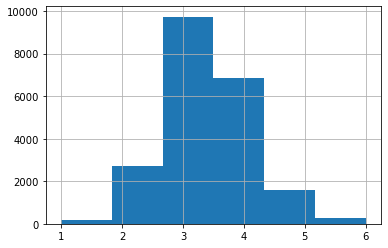

In [39]:
beds['bedrooms'].hist(bins=6)

The distribution looks pretty normal.  Lets test to see if the model performs with beds as a category or a continuous variable.

In [40]:
# model with beds as a continuous variable

X = beds.drop('price', axis =1)
y = beds['price']

quicktest(X, y)

{'r2_adjusted': 0.9060029806549386,
 'train_rmse': 199778.70702497,
 'test_rmse': 201306.85856672865,
 'diff_rmse': 1528.1515417586488}

In [41]:
# try with beds as categorical

dummies = pd.get_dummies(beds['bedrooms'], drop_first=True)
X = X.combine_first(dummies)
X.drop('bedrooms', axis=1, inplace = True)

quicktest(X, y)

{'r2_adjusted': 0.9064472693386421,
 'train_rmse': 199274.66810454853,
 'test_rmse': 200828.89008935483,
 'diff_rmse': 1554.221984806296}

The difference is not significant.  The $R^2$ goes up, but the fit is worse.  **Keep bedrooms continuous.**


In [42]:
## Store the model
X = beds.drop('price', axis =1)
y = beds['price']

quicktest(X, y, '1 (Bedrooms Dropped)')

{'r2_adjusted': 0.9060029806549386,
 'train_rmse': 199778.70702497,
 'test_rmse': 201306.85856672865,
 'diff_rmse': 1528.1515417586488}

In [43]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.905289,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.906003,199778.707025,201306.858567,1528.151542


## bathrooms

In [44]:
baths = beds.copy()

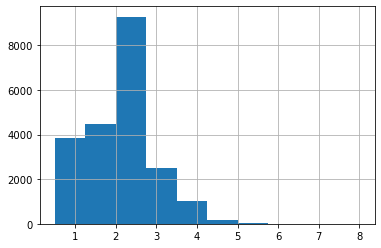

In [45]:
baths['bathrooms'].hist()

In [46]:
baths['bathrooms'].value_counts().sort_index()

0.50       4
0.75      70
1.00    3793
1.25       9
1.50    1427
1.75    3019
2.00    1912
2.25    2028
2.50    5349
2.75    1176
3.00     738
3.25     584
3.50     723
3.75     152
4.00     126
4.25      77
4.50      94
4.75      21
5.00      20
5.25      12
5.50       9
5.75       3
6.00       5
6.25       2
6.50       2
6.75       1
7.75       1
8.00       1
Name: bathrooms, dtype: int64

In [47]:
# drop everything above 5 bathrooms.  There aren't that many and we are interested in smaller flippable homes.
baths = baths[baths['bathrooms'] <=5]
baths['bathrooms'].value_counts().sort_index()

0.50       4
0.75      70
1.00    3793
1.25       9
1.50    1427
1.75    3019
2.00    1912
2.25    2028
2.50    5349
2.75    1176
3.00     738
3.25     584
3.50     723
3.75     152
4.00     126
4.25      77
4.50      94
4.75      21
5.00      20
Name: bathrooms, dtype: int64

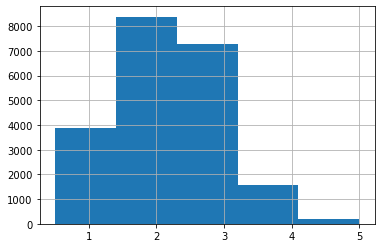

In [48]:
baths['bathrooms'].hist(bins=5)

In [49]:
# model with bathrooms as a continuous variable

X = baths.drop('price', axis =1)
y = baths['price']

quicktest(X, y)

{'r2_adjusted': 0.9124582887055448,
 'train_rmse': 188772.42656092902,
 'test_rmse': 190028.7840653862,
 'diff_rmse': 1256.3575044571771}

In [50]:
# try with beds as categorical

dummies = pd.get_dummies(baths['bathrooms'], drop_first=True)
X = X.combine_first(dummies)
X.drop('bathrooms', axis=1, inplace = True)

quicktest(X, y)

{'r2_adjusted': 0.9165187253002647,
 'train_rmse': 184192.46240933688,
 'test_rmse': 185818.92888817246,
 'diff_rmse': 1626.4664788355876}

In [51]:
# Try group the bathrooms together regardless of size.
temp_df = baths.copy()
temp_df['bathroom_count'] = (temp_df['bathrooms'] // 1) + (np.ceil(temp_df['bathrooms'] % 1))
temp_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathroom_count
id,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,3.0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,1.0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,3.0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0


In [52]:
dummies = pd.get_dummies(temp_df['bathroom_count'], prefix='baths', drop_first=True)
temp_df = temp_df.combine_first(dummies)
temp_df

,bathroom_count,bathrooms,baths_2.0,baths_3.0,baths_4.0,baths_5.0,bedrooms,condition,floors,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,1.00,0.0,0.0,0.0,0.0,3,3,1.0,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,5650,0.0,0.0,1955,0.0,98178
6414100192,3.0,2.25,0.0,1.0,0.0,0.0,3,3,2.0,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7242,7639,0.0,0.0,1951,1991.0,98125
5631500400,1.0,1.00,0.0,0.0,0.0,0.0,2,3,1.0,6,47.7379,-122.233,180000.0,770,0,770,2720,10000,8062,0.0,0.0,1933,0.0,98028
2487200875,3.0,3.00,0.0,1.0,0.0,0.0,4,5,1.0,7,47.5208,-122.393,604000.0,1050,910,1960,1360,5000,5000,0.0,0.0,1965,0.0,98136
1954400510,2.0,2.00,1.0,0.0,0.0,0.0,3,3,1.0,8,47.6168,-122.045,510000.0,1680,0,1680,1800,8080,7503,0.0,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3.0,2.50,0.0,1.0,0.0,0.0,3,3,3.0,8,47.6993,-122.346,360000.0,1530,0,1530,1530,1131,1509,0.0,0.0,2009,0.0,98103
6600060120,3.0,2.50,0.0,1.0,0.0,0.0,4,3,2.0,8,47.5107,-122.362,400000.0,2310,0,2310,1830,5813,7200,0.0,0.0,2014,0.0,98146
1523300141,1.0,0.75,0.0,0.0,0.0,0.0,2,3,2.0,7,47.5944,-122.299,402101.0,1020,0,1020,1020,1350,2007,0.0,0.0,2009,0.0,98144


In [53]:
X = temp_df.drop(columns=['price', 'bathrooms', 'bathroom_count'])

quicktest(X, y)

{'r2_adjusted': 0.9155490035423766,
 'train_rmse': 185371.1441774164,
 'test_rmse': 186517.09038589982,
 'diff_rmse': 1145.946208483423}

In [54]:
X.head(2)

,baths_2.0,baths_3.0,baths_4.0,baths_5.0,bedrooms,condition,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,
7129300520,0.0,0.0,0.0,0.0,3,3,1.0,7,47.5112,-122.257,1180,0,1180,1340,5650,5650,0.0,0.0,1955,0.0,98178
6414100192,0.0,1.0,0.0,0.0,3,3,2.0,7,47.7210,-122.319,2170,400,2570,1690,7242,7639,0.0,0.0,1951,1991.0,98125


In [55]:
baths

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [56]:
# Try full vs partial baths

# Try group the bathrooms together regardless of size.

y = baths['price']
X = baths.copy()
X['baths_full'] = X['bathrooms'] // 1
X['baths_partial'] = np.ceil(X['bathrooms'] % 1)
X.drop(columns=['price', 'bathrooms'], inplace = True)
X.head(2)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,baths_full,baths_partial
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.0,0.0
6414100192,3,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,1.0


In [57]:
quicktest(X, y)


{'r2_adjusted': 0.9130398053019056,
 'train_rmse': 188131.8239856115,
 'test_rmse': 189368.63442949863,
 'diff_rmse': 1236.8104438871378}

For our use case it would be more convenient to be able to talk about the value of an additional bathroom or partial bathroom than the value of the 3rd or 4th bathroom so we will use keep this iteration

In [58]:
baths['baths_full'] = baths['bathrooms'] // 1
baths['baths_partial'] = np.ceil(baths['bathrooms'] % 1)
y = baths['price']
X = baths.drop(columns=['price', 'bathrooms'])
X.head(2)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,baths_full,baths_partial
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.0,0.0
6414100192,3,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,1.0


In [59]:
quicktest(X, y, name='2 (Bathrooms dropped and divided)')

{'r2_adjusted': 0.9130398053019056,
 'train_rmse': 188131.8239856115,
 'test_rmse': 189368.63442949863,
 'diff_rmse': 1236.8104438871378}

In [60]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.905289,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.906003,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.913040,188131.823986,189368.634429,1236.810444


## sqft _living

In [61]:
#start from where the last model left off
sl = baths.copy()

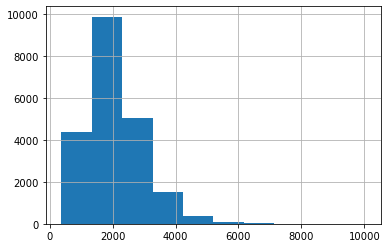

In [62]:
sl['sqft_living'].hist()

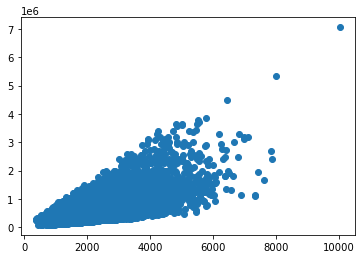

In [63]:
plt.scatter(sl['sqft_living'], sl['price'])

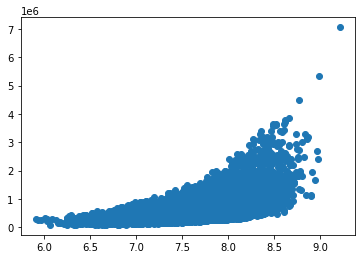

In [64]:
plt.scatter(np.log(sl['sqft_living']), sl['price'])

We can see that the data starts to get sparse somewhere between 5k and 6k.  Having less data will make our predictions in that range less accurate.  Lets drop above 6k sqft and see what it does to our model.

In [65]:
X = sl[sl['sqft_living'] <= 6000].copy()
y = X['price']
X.drop(['price'], axis=1, inplace=True)

quicktest(X, y)

{'r2_adjusted': 0.9159839868025383,
 'train_rmse': 182208.2078825294,
 'test_rmse': 183512.81743330898,
 'diff_rmse': 1304.609550779598}

In [66]:
# try with the dropped rows and sqft_living log transformed
X=sl[sl['sqft_living'] <= 6000].copy()
y = X['price']
X['sqft_living_log'] = np.log(X['sqft_living'])
X.drop(columns=['price','sqft_living'], inplace=True)
quicktest(X, y)

{'r2_adjusted': 0.9186388883241179,
 'train_rmse': 179287.33441873308,
 'test_rmse': 180450.54605643457,
 'diff_rmse': 1163.21163770149}

In [67]:
# try with sqft_living log transformed
X=sl.copy()
X['sqft_living_log'] = np.log(sl['sqft_living'])
X.drop(columns = ['price', 'sqft_living'], inplace=True)
y = sl['price']
quicktest(X, y)

{'r2_adjusted': 0.9168464111574192,
 'train_rmse': 183928.21845116038,
 'test_rmse': 185051.15182112326,
 'diff_rmse': 1122.933369962877}

We will keep the log transform and the dropped rows

In [68]:
# try with the dropped rows and sqft_living log transformed
sl=sl[sl['sqft_living'] <= 6000].copy()
y = sl['price']
sl['sqft_living_log'] = np.log(sl['sqft_living'])
sl.drop('sqft_living', axis=1, inplace=True)

X = sl.drop(columns=['price'])
quicktest(X, y, name='3 (sqft_living outliers and log)')

{'r2_adjusted': 0.9186388883241179,
 'train_rmse': 179287.33441873308,
 'test_rmse': 180450.54605643457,
 'diff_rmse': 1163.21163770149}

In [69]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.905289,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.906003,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.913040,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers and log),0.918639,179287.334419,180450.546056,1163.211638


## sqft_lot

In [70]:
lot = sl.copy()

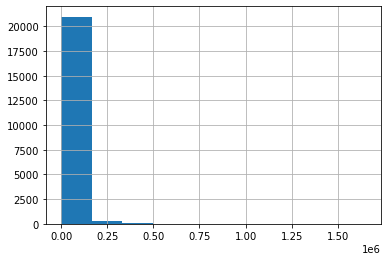

In [71]:
lot['sqft_lot'].hist()

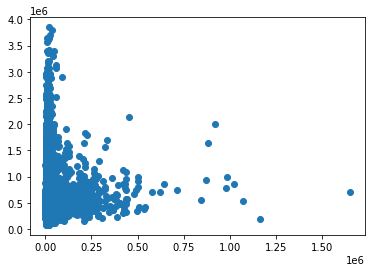

In [72]:
plt.scatter(lot['sqft_lot'], lot['price'])

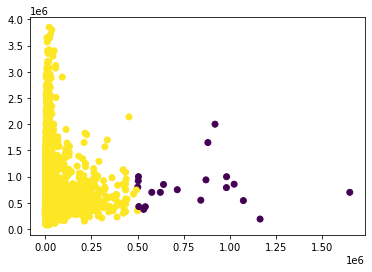

In [73]:
# drop the really big lots
color = [-1 if x > 500000 else 0 for x in lot['sqft_lot']]

plt.scatter(lot['sqft_lot'], lot['price'], c=color)

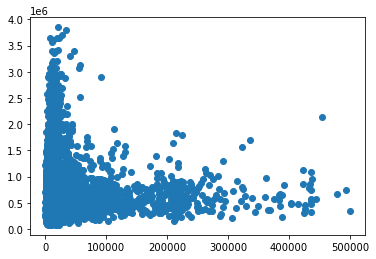

In [74]:
lot = lot[lot['sqft_lot'] < 500000]
plt.scatter(lot['sqft_lot'], lot['price'])

In [75]:
y = lot['price']
X = lot.drop(columns=['price'])
quicktest(X, y)

{'r2_adjusted': 0.9187166328800097,
 'train_rmse': 179105.1972148604,
 'test_rmse': 180300.1884870792,
 'diff_rmse': 1194.9912722187873}

That didn't really help.

Try log transform.

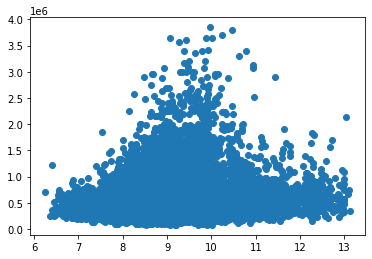

In [76]:
plt.scatter(np.log(lot['sqft_lot']), lot['price'])

(array([ 240.,  997., 2129., 8525., 6552., 1260.,  923.,  304.,  255.,
          79.]),
 array([ 6.25382881,  6.94059643,  7.62736405,  8.31413167,  9.00089929,
         9.68766691, 10.37443453, 11.06120215, 11.74796977, 12.43473739,
        13.12150501]),
 <a list of 10 Patch objects>)

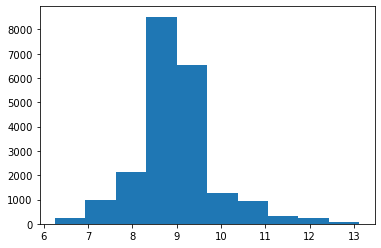

In [77]:
plt.hist(np.log(lot['sqft_lot']))

That is much more normal.  Check the model.

In [78]:
temp_df

,bathroom_count,bathrooms,baths_2.0,baths_3.0,baths_4.0,baths_5.0,bedrooms,condition,floors,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.0,1.00,0.0,0.0,0.0,0.0,3,3,1.0,7,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,5650,0.0,0.0,1955,0.0,98178
6414100192,3.0,2.25,0.0,1.0,0.0,0.0,3,3,2.0,7,47.7210,-122.319,538000.0,2170,400,2570,1690,7242,7639,0.0,0.0,1951,1991.0,98125
5631500400,1.0,1.00,0.0,0.0,0.0,0.0,2,3,1.0,6,47.7379,-122.233,180000.0,770,0,770,2720,10000,8062,0.0,0.0,1933,0.0,98028
2487200875,3.0,3.00,0.0,1.0,0.0,0.0,4,5,1.0,7,47.5208,-122.393,604000.0,1050,910,1960,1360,5000,5000,0.0,0.0,1965,0.0,98136
1954400510,2.0,2.00,1.0,0.0,0.0,0.0,3,3,1.0,8,47.6168,-122.045,510000.0,1680,0,1680,1800,8080,7503,0.0,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3.0,2.50,0.0,1.0,0.0,0.0,3,3,3.0,8,47.6993,-122.346,360000.0,1530,0,1530,1530,1131,1509,0.0,0.0,2009,0.0,98103
6600060120,3.0,2.50,0.0,1.0,0.0,0.0,4,3,2.0,8,47.5107,-122.362,400000.0,2310,0,2310,1830,5813,7200,0.0,0.0,2014,0.0,98146
1523300141,1.0,0.75,0.0,0.0,0.0,0.0,2,3,2.0,7,47.5944,-122.299,402101.0,1020,0,1020,1020,1350,2007,0.0,0.0,2009,0.0,98144


In [79]:
temp_df = lot.copy()
temp_df['sqft_lot_log'] = np.log(temp_df['sqft_lot'])

X = temp_df.drop(columns=['price', 'sqft_lot'])
y = temp_df['price']

quicktest(X, y)

{'r2_adjusted': 0.9190639959701579,
 'train_rmse': 178656.20437361643,
 'test_rmse': 179715.1069839552,
 'diff_rmse': 1058.9026103387587}

In [80]:
# Check correlation between sqft_living and sqft_lot since we did the same transformations on them.
X[['sqft_living_log', 'sqft_lot_log']].corr()

,sqft_living_log,sqft_lot_log
sqft_living_log,1.000000,0.318093
sqft_lot_log,0.318093,1.000000


In [81]:
#save it

lot = temp_df

quicktest(X, y, name='4 (sqft_lot outliers and log)')

{'r2_adjusted': 0.9190639959701579,
 'train_rmse': 178656.20437361643,
 'test_rmse': 179715.1069839552,
 'diff_rmse': 1058.9026103387587}

In [82]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.905289,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.906003,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.913040,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers and log),0.918639,179287.334419,180450.546056,1163.211638
4 (sqft_lot outliers and log),0.919064,178656.204374,179715.106984,1058.902610


Thats a tiny bit better.  Lets move on.

## Floors

In [83]:
floors = lot.copy()

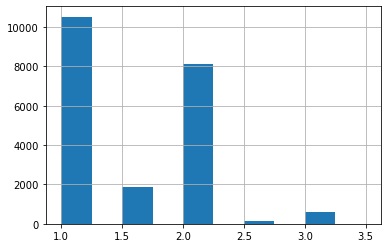

In [84]:
floors['floors'].hist()

I would say there is no such thing as half a floor.  Lets group these into the number of floors regardless of how much of the house the floor covers, and see if they perform better as continuous or categorical variables.

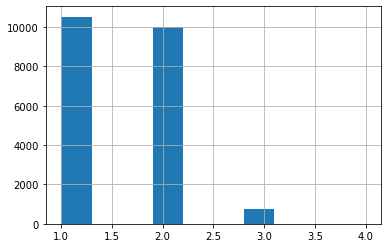

In [85]:
df1 = floors.copy()
df1['floor_count'] = np.ceil(df1['floors']).astype('int')
df1 = df1.drop(columns=['floors'])
df1['floor_count'].hist()

In [86]:
# How many have 4 floors?
df1[df1['floor_count'] > 3]

,price,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,baths_full,baths_partial,sqft_living_log,sqft_lot_log,floor_count
id,,,,,,,,,,,,,,,,,,,,,,
1972202010,435000.0,3,3.00,1350,0.0,2.0,3,8,1440,0,2005,0.0,98103,47.6525,-122.345,1440,1350,3.0,0.0,7.272398,7.207860,4
3180100023,544000.0,3,2.50,1755,0.0,0.0,3,8,1760,0,1998,0.0,98105,47.6688,-122.279,1700,1721,2.0,1.0,7.473069,7.470224,4
8673400177,525000.0,3,3.00,1074,0.0,0.0,3,8,1730,0,2006,0.0,98107,47.6692,-122.392,1370,1185,3.0,0.0,7.455877,6.979145,4
1702900664,479000.0,2,2.50,1037,0.0,0.0,3,8,1730,0,2008,0.0,98118,47.5594,-122.285,1280,1026,2.0,1.0,7.455877,6.944087,4
1972200426,525000.0,2,2.75,1268,0.0,0.0,3,8,1310,0,2007,0.0,98103,47.6534,-122.355,1350,1288,2.0,1.0,7.177782,7.145196,4
1972200428,563500.0,3,2.50,1312,0.0,0.0,3,8,1400,0,2007,0.0,98103,47.6534,-122.355,1350,1312,2.0,1.0,7.244228,7.179308,4


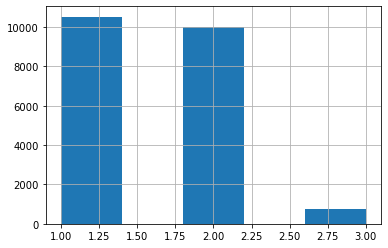

In [87]:
# drop them
df1 = df1[df1['floor_count'] < 4]
df1['floor_count'].hist(bins=5)

In [88]:
X = df1.drop(columns=['price'])
y = df1['price']

quicktest(X, y)

{'r2_adjusted': 0.9192390705602923,
 'train_rmse': 178444.7626225047,
 'test_rmse': 179460.65322084585,
 'diff_rmse': 1015.8905983411532}

Thats an improvement.  Now lets see if its better as a categorical.

In [91]:
df2 = df1.copy()
dummies = pd.get_dummies(df2['floor_count'], prefix='floors', drop_first=True)
df2 = df2.combine_first(dummies)
df2 = df2.drop(columns=['floor_count'])
df2.head(2)

,bathrooms,baths_full,baths_partial,bedrooms,condition,floors_2,floors_3,grade,lat,long,price,sqft_above,sqft_basement,sqft_living15,sqft_living_log,sqft_lot,sqft_lot15,sqft_lot_log,view,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,,,,,
7129300520,1.00,1.0,0.0,3,3,0.0,0.0,7,47.5112,-122.257,221900.0,1180,0,1340,7.073270,5650,5650,8.639411,0.0,0.0,1955,0.0,98178
6414100192,2.25,2.0,1.0,3,3,1.0,0.0,7,47.7210,-122.319,538000.0,2170,400,1690,7.851661,7242,7639,8.887653,0.0,0.0,1951,1991.0,98125


In [92]:
X = df2.drop(columns=['price'])
y = df2['price']

quicktest(X, y)

{'r2_adjusted': 0.9192954854793941,
 'train_rmse': 178365.8457784076,
 'test_rmse': 179382.87345100968,
 'diff_rmse': 1017.0276726020966}

There is no benefit to having floors as a categorical variable.

In [93]:
X = df1.drop(columns=['price'])
y = df1['price']

quicktest(X, y, name='5 (Floors -> floor count)')

{'r2_adjusted': 0.9192390705602923,
 'train_rmse': 178444.7626225047,
 'test_rmse': 179460.65322084585,
 'diff_rmse': 1015.8905983411532}

In [94]:
model_report()

,r2_adjusted,test_rmse,train_rmse,diff_rmse
baseline,0.905289,201209.512420,202862.451447,1652.939027
1 (Bedrooms Dropped),0.906003,199778.707025,201306.858567,1528.151542
2 (Bathrooms dropped and divided),0.913040,188131.823986,189368.634429,1236.810444
3 (sqft_living outliers and log),0.918639,179287.334419,180450.546056,1163.211638
4 (sqft_lot outliers and log),0.919064,178656.204374,179715.106984,1058.902610
5 (Floors -> floor count),0.919239,178444.762623,179460.653221,1015.890598


In [97]:
# save the final df for floors
floors = df1.copy()

## waterfront

In [98]:
wf = floors.copy()

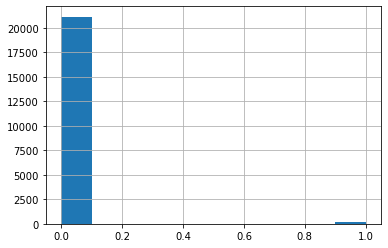

In [99]:
wf['waterfront'].hist()